# testing jupyter-book ok using fnn examples

from https://github.com/markjay4k/fourier-transform 
as only use matplotlib inline

# NUMERICAL INTEGRATION

# What is numerical Integration

### <b>Numerical</b> Integration is a way to approximate the value of a definite integral

### Unlike Analytic solutions which are exact, closed form solutions

# Numerical Integration
There are many options for numerically computing definite integrals:
- Trapezoid Rule

- Simpsons Rule

- Gaussian Quadrature

- etc.

## Let's look at the Trapezoid Rule

The Trapezoid rule is a way of approximating a definite integral by breaking it up into trapezoids. 

Let's say we want to compute the integral

$$ \int_0^{\pi} \sin(x)dx $$

We can easily compute it analytically

$$ \int_0^{\pi} \sin(x)dx = -\cos(x) \big|_0^{\pi} $$

$$ =-(\cos(\pi) - \cos(0)) $$

$$ = -(-1 - 1)$$

$$ 2 $$

But let's try computing using the trapezoid rule.

Below is a visualization showing $\sin(x)$ and a trapezoid approximation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams.update({'font.size': 19})

def f(x):
    return np.sin(x)

def trap_plot(n_points):
    x = np.linspace(0, np.pi, 1000)          # continuous
    x_i = np.linspace(0, np.pi, n_points)    # discrete

    plt.plot(x, f(x), label=r'$\sin(x)$')
    plt.plot(x_i, f(x_i), '-o', label=r'$Trap$ ({})'.format(n_points))
    plt.fill(x_i, f(x_i), color='C1', alpha=0.15)
    plt.vlines(x_i, 0, f(x_i), color='C1', linestyle=':')
    plt.xticks(x_i, [r'$x_{}$'.format(n) for n in range(n_points)])
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.legend(loc='best')
    plt.ylim(0, 1.05)
    plt.show()

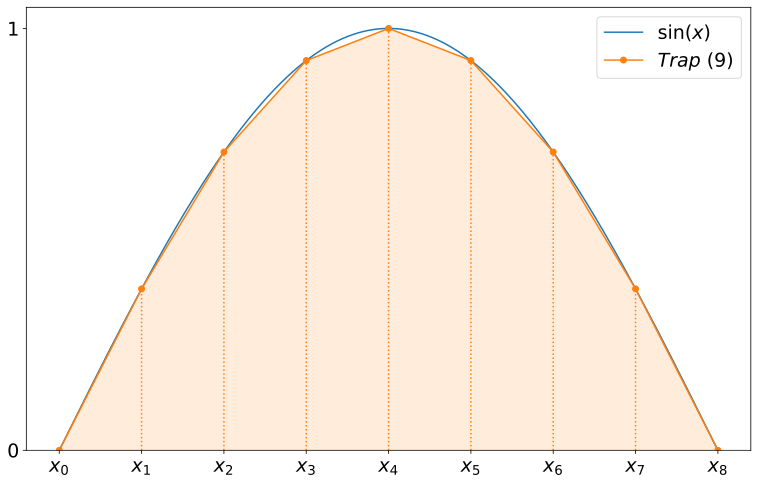

In [2]:
trap_plot(9)

## Area of a Trapezoid

The area of a trapezoid is the average height times the base

<img src="trap2.png" width=400>

For the example shown, the area is 

$$
Area = \overbrace{\frac{f(x_{k-1}) + f(x_k)}{2}}^{ave \, height} \,\, \overbrace{\Delta x}^{base}
$$

## trapezoid rule equation

the equation for the trapezoid rule is 

$$
\int_a^b f(x)dx \approx \frac{f(x_0) + f(x_1)}{2}\Delta x + \frac{f(x_1) + f(x_2)}{2}\Delta x \cdots \frac{f(x_{N-1}) + f(x_N)}{2}\Delta x
$$

Now we can write this as a summation
$$
\approx \sum_{k=1}^N \frac{f(x_{k-1}) + f(x_k)}{2} \Delta x
$$

And we can write a function to compute this

$$
\approx \sum_{k=1}^N \frac{f(x_{k-1}) + f(x_k)}{2} \Delta x
$$

In [3]:
def trap(f, x):
    """
    computes the integral of f using trapezoid rule
    """
    area = 0
    N = len(x)
    dx = x[1] - x[0]
    
    for k in range(1, N):
        area += (f(x[k - 1]) + f(x[k])) * dx / 2
        
    return area

In [4]:
x = np.linspace(0, np.pi, 20)
trap(f, x)

1.9954413183201944

## Error vs. number of Trapezoids

As we increase the number of trapezoids, the approximation gets better ($error \rightarrow 0$).
$$error = (actual - approximation)^2$$

In [5]:
plt.rcParams['figure.figsize'] = (11, 6)
def plot_error(n_points):
    for n in range(2, n_points):
        x = np.linspace(0, np.pi, n)
        plt.plot(n - 1, (trap(f, x) - 2) ** 2, 'bo')

        plt.axhline(0, color='black', lw=1)
        plt.xlabel('# of trapezoids')
        plt.ylabel('error')
    plt.show()

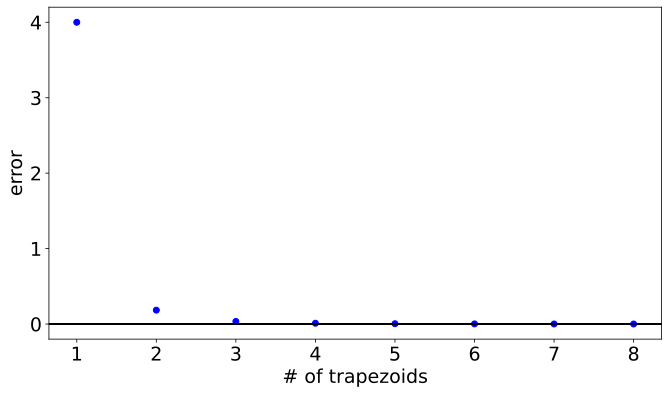

In [6]:
plot_error(10)